Found 3662 images belonging to 2 classes.
Found 768 images belonging to 2 classes.
Epoch 1/10
229/229 [==============================] - 1318s 6s/step - loss: 0.4403 - accuracy: 0.8460 - val_loss: 0.6796 - val_accuracy: 0.8008
Epoch 2/10
229/229 [==============================] - 1157s 5s/step - loss: 0.4013 - accuracy: 0.8512 - val_loss: 0.6128 - val_accuracy: 0.8008
Epoch 3/10
229/229 [==============================] - 1198s 5s/step - loss: 0.3206 - accuracy: 0.8768 - val_loss: 2.5370 - val_accuracy: 0.2786
Epoch 4/10
229/229 [==============================] - 1151s 5s/step - loss: 0.2630 - accuracy: 0.9033 - val_loss: 0.4448 - val_accuracy: 0.8372
Epoch 5/10
229/229 [==============================] - 1117s 5s/step - loss: 0.2656 - accuracy: 0.9039 - val_loss: 0.3276 - val_accuracy: 0.8815
Epoch 6/10
229/229 [==============================] - 1124s 5s/step - loss: 0.2570 - accuracy: 0.9033 - val_loss: 0.4087 - val_accuracy: 0.8542
Epoch 7/10
229/229 [==============================] -

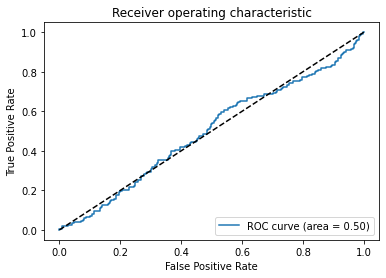

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Set the random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the data directories
train_dir = 'C:/Users/nikes/Downloads/SAUNAR/Train'
test_dir = 'C:/Users/nikes/Downloads/SAUNAR/Test'

# Define the image size and batch size
img_size = 224
batch_size = 16

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

# Define the ResNet50 model
resnet = ResNet50(include_top=False, input_shape=(img_size, img_size, 3), pooling='avg', weights='imagenet')
x = resnet.output
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator).flatten()

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred > 0.5)
print('Confusion matrix:\n', cm)
print('Classification report:\n', classification_report(y_true, y_pred > 0.5))

# Compute the sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Set the random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the data directories
train_dir = 'C:/Users/nikes/Downloads/SAUNAR/Train'
test_dir = 'C:/Users/nikes/Downloads/SAUNAR/Test'


In [ ]:
# Define the image size and batch size
img_size = 224
batch_size = 16

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

In [ ]:
# Define the ResNet50 model
resnet = ResNet50(include_top=False, input_shape=(img_size, img_size, 3), pooling='avg', weights='imagenet')
x = resnet.output
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


In [ ]:
# Make predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator).flatten()

In [ ]:
# Compute the confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred > 0.5)
print('Confusion matrix:\n', cm)
print('Classification report:\n', classification_report(y_true, y_pred > 0.5))

In [ ]:
# Compute the sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


In [ ]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()